In [ ]:
pip install mplbasketball

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from IPython.display import display, Markdown
import matplotlib.colors as mcolors
from matplotlib.patches import Circle, Rectangle, Arc

In [2]:
# Display the full DataFrame without truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

# Guards

## Traditional

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Base",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        traditional_stats = pd.DataFrame(result_set, columns=headers)
        
        # Drop unnecessary columns
        columns_to_drop = [
            'Unnamed: 0', "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", 'GP', 'W', 'L', 'W_PCT', 'MIN', 
            'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK',
            'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'PTS_RANK',
            'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
            'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
            'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
            'PF_RANK', 'PFD_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
            'WNBA_FANTASY_PTS_RANK'
        ]
        traditional_stats = traditional_stats.drop(columns=[col for col in columns_to_drop if col in traditional_stats.columns])

        # Rename columns
        traditional_stats = traditional_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",        
            "TEAM_ABBREVIATION": "TEAM",
            "FG_PCT": "FG%",
            "FT_PCT": "FT%",
            "FG3M": "3PM",
            "FG3A": "3PA",
            "FG3_PCT": "3P%",
            "PLUS_MINUS": "+/-"
        })

        # Round the MIN column to one decimal point (if it exists)
        if "MIN" in traditional_stats.columns:
            traditional_stats["MIN"] = traditional_stats["MIN"].round(1)

        # Display the plain DataFrame (without any color coding or rank formatting)
        from IPython.display import display
        display(traditional_stats)

else:
    print(f"Request failed with status code {response.status_code}")

,PLAYER,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,+/-
0,A.J. Lawson,RAP,6.6,14.9,0.445,2.4,6.1,0.396,2.0,3.0,0.642,0.7,4.0,4.8,2.3,2.0,1.3,0.3,1.1,2.7,3.5,19.0,1.8
1,A.J. Reeves,BHM,1.1,3.5,0.316,0.7,2.5,0.286,0.3,0.4,0.750,0.4,1.1,1.5,0.9,0.4,0.0,0.1,0.3,0.9,0.4,3.3,-1.5
2,AJ Johnson,CCG,5.2,11.9,0.437,2.0,4.7,0.429,1.1,1.4,0.731,0.6,3.1,3.7,3.6,2.8,0.8,0.2,1.3,2.6,1.7,14.3,0.6
3,Aaron Estrada,MCC,3.7,8.2,0.450,1.3,4.0,0.324,0.4,0.5,0.750,0.9,2.2,3.2,3.5,2.1,0.6,0.1,0.4,0.9,0.6,9.2,0.2
4,Ade Murkey,WIS,2.6,7.0,0.368,1.2,3.8,0.315,0.6,0.7,0.786,0.6,1.4,2.0,1.5,0.8,1.2,0.5,0.4,1.7,1.3,7.5,-0.2
5,Alex Ducas,OKL,1.5,7.0,0.214,1.0,5.0,0.200,1.0,1.0,1.000,0.0,2.0,2.0,0.5,1.0,1.0,0.0,0.5,0.5,1.0,5.5,-10.5
6,Alex Gil-Fernandez,SCW,1.0,2.0,0.500,0.8,1.4,0.571,0.4,0.6,0.667,1.2,0.6,1.8,1.0,0.6,0.6,0.4,0.4,1.8,0.6,3.4,-0.2
7,Alex Morales,OSC,3.4,7.2,0.477,0.7,2.4,0.279,0.6,0.9,0.647,1.6,3.7,5.3,3.5,2.1,1.7,0.4,0.8,2.1,1.5,8.7,3.4
8,Alex O'Connell,WES,3.3,7.5,0.441,1.4,4.2,0.327,0.3,0.4,0.700,1.5,2.5,4.0,1.4,1.1,0.6,0.2,0.4,1.1,0.6,8.5,-3.8
9,Alex Schumacher,VAL,3.1,8.2,0.381,0.5,2.8,0.194,0.8,0.9,0.905,0.7,1.8,2.5,3.0,2.1,0.6,0.2,0.6,1.6,1.6,8.1,-5.8


## Advanced

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Advanced",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        advanced_stats = pd.DataFrame(result_set, columns=headers)

        # Columns to drop
        columns_to_drop = [
            "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", "GP", "W", "L", "W_PCT", 
            "E_OFF_RATING", "sp_work_OFF_RATING", "E_DEF_RATING", "sp_work_DEF_RATING", 
            "E_NET_RATING", "sp_work_NET_RATING", "E_TOV_PCT", "E_USG_PCT", 
            "E_PACE", "PACE_PER40", "sp_work_PACE", "POSS", "FGM", "FGA", 
            "FGM_PG", "FGA_PG", "FG_PCT", "GP_RANK", "W_RANK", "L_RANK", 
            "W_PCT_RANK", "MIN_RANK", "E_OFF_RATING_RANK", "OFF_RATING_RANK", 
            "sp_work_OFF_RATING_RANK", "E_DEF_RATING_RANK", "DEF_RATING_RANK", 
            "sp_work_DEF_RATING_RANK", "E_NET_RATING_RANK", "NET_RATING_RANK", 
            "sp_work_NET_RATING_RANK", "AST_PCT_RANK", "AST_TO_RANK", "AST_RATIO_RANK", 
            "OREB_PCT_RANK", "DREB_PCT_RANK", "REB_PCT_RANK", "TM_TOV_PCT_RANK", "E_TOV_PCT_RANK",
            "EFG_PCT_RANK", "TS_PCT_RANK", "USG_PCT_RANK", "E_USG_PCT_RANK", "E_PACE_RANK", 
            "PACE_RANK", "sp_work_PACE_RANK", "PIE_RANK", "FGM_RANK", "FGA_RANK", "FGM_PG_RANK",
            "FGA_PG_RANK", "FG_PCT_RANK"
        ]
        
        # Drop specified columns
        advanced_stats = advanced_stats.drop(columns=[col for col in columns_to_drop if col in advanced_stats.columns])

        # Rename columns
        advanced_stats = advanced_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",
            "TEAM_ABBREVIATION": "TEAM",
            "OFF_RATING": "OFFRTG",
            "DEF_RATING": "DEFRTG",
            "NET_RATING": "NETRTG",
            "AST_PCT": "AST%",
            "AST_TO": "AST/TO",
            "AST_RATIO": "AST RATIO",
            "OREB_PCT": "OREB%",
            "DREB_PCT": "DREB%",
            "REB_PCT": "REB%",
            "TM_TOV_PCT": "TO RATIO",
            "EFG_PCT": "EFG%",
            "TS_PCT": "TS%",
            "USG_PCT": "USG%"
        })

        # Round the MIN column to one decimal point
        if "MIN" in advanced_stats.columns:
            advanced_stats["MIN"] = advanced_stats["MIN"].round(1)

        # Display the styled DataFrame
        from IPython.display import display
        display(advanced_stats)

else:
    print(f"Request failed with status code {response.status_code}")

,PLAYER,TEAM,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,A.J. Lawson,RAP,31.8,111.2,109.4,1.8,0.105,1.16,10.5,0.022,0.121,0.072,9.1,0.526,0.586,0.246,104.62,0.095
1,A.J. Reeves,BHM,9.8,103.4,109.3,-5.9,0.133,2.50,18.5,0.033,0.092,0.064,7.4,0.421,0.453,0.165,104.53,0.044
2,AJ Johnson,CCG,28.6,110.9,109.9,1.0,0.190,1.28,18.3,0.021,0.097,0.061,14.3,0.521,0.570,0.235,100.21,0.081
3,Aaron Estrada,MCC,19.9,105.9,106.0,0.0,0.260,1.69,24.8,0.044,0.102,0.073,14.7,0.529,0.547,0.210,102.29,0.109
4,Ade Murkey,WIS,20.2,108.5,108.2,0.3,0.109,1.87,14.9,0.030,0.061,0.046,8.0,0.455,0.510,0.176,99.97,0.061
5,Alex Ducas,OKL,28.8,97.7,115.7,-18.1,0.024,0.50,5.6,0.000,0.060,0.031,11.1,0.286,0.370,0.117,106.61,0.016
6,Alex Gil-Fernandez,SCW,13.2,115.1,111.9,3.1,0.089,1.67,25.0,0.072,0.037,0.055,15.0,0.700,0.751,0.088,107.80,0.047
7,Alex Morales,OSC,29.4,113.1,107.2,5.9,0.151,1.70,26.0,0.053,0.108,0.082,15.3,0.523,0.567,0.137,102.23,0.082
8,Alex O'Connell,WES,22.1,108.0,116.2,-8.2,0.092,1.30,13.6,0.058,0.113,0.083,10.5,0.532,0.554,0.157,105.04,0.075
9,Alex Schumacher,VAL,22.7,98.5,110.2,-11.7,0.203,1.43,21.8,0.027,0.074,0.050,15.2,0.414,0.470,0.202,98.11,0.060


## Defense

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Defense",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        defense_stats = pd.DataFrame(result_set, columns=headers)

        # Columns to drop
        columns_to_drop = [
            "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", "GP", "W", "L", "W_PCT", "GP_RANK", "W_RANK", "L_RANK",
            "W_PCT_RANK", "MIN_RANK", "DEF_RATING_RANK", "DREB_RANK", 
            "DREB_PCT_RANK", "PCT_DREB_RANK", "STL_RANK", "PCT_STL_RANK",
            "BLK_RANK", "PCT_BLK_RANK", "OPP_PTS_OFF_TOV_RANK", 
            "OPP_PTS_2ND_CHANCE_RANK", "OPP_PTS_FB_RANK", "OPP_PTS_PAINT_RANK",
            "DEF_WS_RANK"
        ]

        # Drop specified columns
        defense_stats = defense_stats.drop(columns=[col for col in columns_to_drop if col in defense_stats.columns])

        # Rename columns
        defense_stats = defense_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",
            "TEAM_ABBREVIATION": "TEAM",
            "DEF_RATING": "DEF RTG",
            "DREB": "DREB",
            "DREB_PCT": "DREB%",
            "PCT_DREB": "%DREB",
            "STL": "STL",
            "PCT_STL": "STL%",
            "BLK": "BLK",
            "PCT_BLK": "%BLK",
            "OPP_PTS_OFF_TOV": "OPP PTS OFF TOV",
            "OPP_PTS_2ND_CHANCE": "OPP PTS 2ND CHANCE",
            "OPP_PTS_FB": "OPP PTS FB",
            "OPP_PTS_PAINT": "OPP PTS PAINT",
            "DEF_WS": "DEF WS"
        })

        # Round the MINUTES column to one decimal point
        if "MIN" in defense_stats.columns:
            defense_stats["MIN"] = defense_stats["MIN"].round(1)

       # Display the styled DataFrame
        from IPython.display import display
        display(defense_stats)

else:
    print(f"Request failed with status code {response.status_code}")

,PLAYER,TEAM,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT,DEF WS
0,A.J. Lawson,RAP,31.8,109.4,4.0,0.121,0.191,1.3,0.239,0.3,0.068,10.6,10.0,9.1,33.6,0.096
1,A.J. Reeves,BHM,9.8,109.3,1.1,0.092,0.152,0.0,0.000,0.1,0.100,4.6,3.6,4.1,10.4,0.031
2,AJ Johnson,CCG,28.6,109.9,3.1,0.097,0.155,0.8,0.157,0.2,0.048,9.9,10.8,7.2,30.0,0.081
3,Aaron Estrada,MCC,19.9,106.0,2.2,0.102,0.160,0.6,0.177,0.1,0.054,8.7,6.2,5.1,18.1,0.081
4,Ade Murkey,WIS,20.2,108.2,1.4,0.061,0.096,1.2,0.328,0.5,0.179,8.6,6.1,6.6,21.7,0.068
5,Alex Ducas,OKL,28.8,115.7,2.0,0.060,0.091,1.0,0.286,0.0,0.000,15.5,6.0,12.0,38.0,0.033
6,Alex Gil-Fernandez,SCW,13.2,111.9,0.6,0.037,0.056,0.6,0.300,0.4,0.400,4.2,4.8,5.8,13.2,0.031
7,Alex Morales,OSC,29.4,107.2,3.7,0.108,0.164,1.7,0.316,0.4,0.129,11.5,10.5,7.9,29.0,0.107
8,Alex O'Connell,WES,22.1,116.2,2.5,0.113,0.169,0.6,0.161,0.2,0.094,8.8,7.0,8.9,28.4,0.022
9,Alex Schumacher,VAL,22.7,110.2,1.8,0.074,0.128,0.6,0.165,0.2,0.058,11.0,9.2,8.9,23.7,0.058


## Shooting by Zone

In [6]:
import requests
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from IPython.display import display

#############################################
# 1. Get Shot Locations (MeasureType: Base) #
#############################################

url_base = "https://stats.gleague.nba.com/stats/leaguedashplayershotlocations"

headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

params_base = {
    "MeasureType": "Base",
    "PerMode": "PerGame",
    "PlusMinus": "N",
    "PaceAdjust": "N",
    "Rank": "N",
    "LeagueID": "20",
    "Season": "2024-25",
    "SeasonType": "Regular Season",
    "PORound": 0,
    "Outcome": "",
    "Location": "",
    "Month": 0,
    "SeasonSegment": "",
    "DateFrom": "",
    "DateTo": "",
    "OpponentTeamID": 0,
    "VsConference": "",
    "VsDivision": "",
    "TeamID": 0,
    "Conference": "",
    "Division": "",
    "GameSegment": "",
    "Period": 0,
    "ShotClockRange": "",
    "LastNGames": 0,
    "DistanceRange": "By Zone",
    "GameScope": "",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "StarterBench": "",
    "DraftYear": "",
    "DraftPick": "",
    "College": "",
    "Country": "",
    "Height": "",
    "Weight": "",
    "ISTRound": ""
}

response_base = requests.get(url_base, headers=headers, params=params_base)

if response_base.status_code == 200:
    data_base = response_base.json()
    if "resultSets" in data_base and "rowSet" in data_base["resultSets"]:
        result_set = data_base["resultSets"]["rowSet"]
        headers_data = data_base["resultSets"]["headers"]
        
        # Get the bottom and top level column names
        bottom_level = headers_data[1]["columnNames"]
        top_level = headers_data[0]["columnNames"]
        
        # We'll use only a subset of the top-level zones:
        valid_top_levels = [
            "Restricted Area", 
            "In The Paint (Non-RA)", 
            "Mid-Range", 
            "Left Corner 3", 
            "Right Corner 3", 
            "Above the Break 3", 
            "Corner 3"
        ]
        valid_top_level_indices = [i for i, name in enumerate(top_level) if name in valid_top_levels]
        
        # Build a MultiIndex for the columns.
        general_columns = ["PLAYER_NAME", "TEAM_ABBREVIATION"]
        valid_general_columns = ["PLAYER", "TEAM"]  # renamed columns
        # Get indices for general columns from bottom_level, then for the shot stats.
        valid_lower_level_indices = [bottom_level.index(col) for col in general_columns] + [
            6 + i for i in range(len(bottom_level[6:])) if (i // 3) in valid_top_level_indices
        ]
        
        # Select only the valid columns
        filtered_bottom_level = [bottom_level[i] for i in valid_lower_level_indices]
        result_set_filtered = [[row[i] for i in valid_lower_level_indices] for row in result_set]
        
        # Adjust top-level names: first for the general columns, then for shot stats.
        top_level_adjusted = [" "] * len(general_columns) + [
            valid_top_levels[i // 3] for i in range(len(filtered_bottom_level) - len(general_columns))
        ]
        bottom_level_adjusted = valid_general_columns + [
            metric for i in range(len(valid_top_levels)) for metric in ["FGM", "FGA", "FG%"]
        ]
        
        multi_index = pd.MultiIndex.from_tuples(zip(top_level_adjusted, bottom_level_adjusted))
        shooting_stats = pd.DataFrame(result_set_filtered, columns=multi_index)
        
        # Convert numeric columns
        for col in shooting_stats.columns:
            if col not in [(" ", "PLAYER"), (" ", "TEAM")]:
                shooting_stats[col] = pd.to_numeric(shooting_stats[col], errors="coerce")
        
        # Rearrange columns: move "Left Corner 3" and "Right Corner 3" to the right of "Corner 3"
        column_order = (
            [col for col in shooting_stats.columns if col[0] not in ["Left Corner 3", "Right Corner 3"]] +
            [col for col in shooting_stats.columns if col[0] in ["Left Corner 3", "Right Corner 3"]]
        )
        shooting_stats = shooting_stats[column_order]
        
    else:
        print("No shot location data available.")
else:
    print(f"Request for shot locations failed with status code {response_base.status_code}")

# Flatten the MultiIndex columns for easier access.
shooting_stats_flat = shooting_stats.copy()
shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip()
    for col in shooting_stats.columns
]

#################################################
# 2. Get Defense Data to Extract the MIN Column  #
#################################################

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayerstatscombined"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "College": "",
    "Conference": "",
    "Country": "",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "DraftPick": "",
    "DraftYear": "",
    "GameScope": "",
    "GameSegment": "",
    "Height": "",
    "LastNGames": "0",
    "LeagueID": "20",
    "Location": "",
    "MeasureType": "Defense",
    "Month": "0",
    "OpponentTeamID": "0",
    "Outcome": "",
    "PORound": "0",
    "PaceAdjust": "N",
    "PerMode": "PerGame",
    "Period": "0",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "PlusMinus": "N",
    "Rank": "N",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StarterBench": "",
    "TeamID": "0",
    "TwoWay": "0",
    "VsConference": "",
    "VsDivision": "",
    "Weight": "",
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()  # Parse the JSON data

    # Extract the relevant data
    if "resultSets" in data and len(data["resultSets"]) > 0:
        result_set = data["resultSets"][0]["rowSet"]
        headers = data["resultSets"][0]["headers"]

        # Convert to a DataFrame
        defense_stats = pd.DataFrame(result_set, columns=headers)

        # Columns to drop
        columns_to_drop = [
            "PLAYER_ID", "NICKNAME", "TEAM_ID", "AGE", "GP", "W", "L", "W_PCT", "GP_RANK", "W_RANK", "L_RANK",
            "W_PCT_RANK", "MIN_RANK", "DEF_RATING_RANK", "DREB_RANK", 
            "DREB_PCT_RANK", "PCT_DREB_RANK", "STL_RANK", "PCT_STL_RANK",
            "BLK_RANK", "PCT_BLK_RANK", "OPP_PTS_OFF_TOV_RANK", 
            "OPP_PTS_2ND_CHANCE_RANK", "OPP_PTS_FB_RANK", "OPP_PTS_PAINT_RANK",
            "DEF_WS_RANK"
        ]

        # Drop specified columns
        defense_stats = defense_stats.drop(columns=[col for col in columns_to_drop if col in defense_stats.columns])

        # Rename columns
        defense_stats = defense_stats.rename(columns={
            "PLAYER_NAME": "PLAYER",
            "TEAM_ABBREVIATION": "TEAM",
            "DEF_RATING": "DEF RTG",
            "DREB": "DREB",
            "DREB_PCT": "DREB%",
            "PCT_DREB": "%DREB",
            "STL": "STL",
            "PCT_STL": "STL%",
            "BLK": "BLK",
            "PCT_BLK": "%BLK",
            "OPP_PTS_OFF_TOV": "OPP PTS OFF TOV",
            "OPP_PTS_2ND_CHANCE": "OPP PTS 2ND CHANCE",
            "OPP_PTS_FB": "OPP PTS FB",
            "OPP_PTS_PAINT": "OPP PTS PAINT",
            "DEF_WS": "DEF WS"
        })

        # Round the MINUTES column to one decimal point
        if "MIN" in defense_stats.columns:
            defense_stats["MIN"] = defense_stats["MIN"].round(1)

# Extract the MIN column from defense_stats.
min_stats = defense_stats[["PLAYER", "MIN"]]

##########################################
# 3. Merge MIN column with Shot Locations#
##########################################

# Merge the MIN column with shooting_stats_flat based on the PLAYER name.
merged_stats = pd.merge(shooting_stats_flat, min_stats, on="PLAYER", how="left")

# Reorder columns so that the shot-location columns come first and MIN is appended.
shot_cols = list(shooting_stats_flat.columns)
merged_stats = merged_stats[shot_cols + ["MIN"]]

# Filter for players who played at least 15 minutes per game.
filtered_stats = merged_stats[merged_stats["MIN"] >= 15]

# Display the final DataFrame (shooting stats with MIN column)
display(filtered_stats)

,PLAYER,TEAM,Restricted Area FGM,Restricted Area FGA,Restricted Area FG%,In The Paint (Non-RA) FGM,In The Paint (Non-RA) FGA,In The Paint (Non-RA) FG%,Mid-Range FGM,Mid-Range FGA,Mid-Range FG%,Above the Break 3 FGM,Above the Break 3 FGA,Above the Break 3 FG%,Corner 3 FGM,Corner 3 FGA,Corner 3 FG%,Left Corner 3 FGM,Left Corner 3 FGA,Left Corner 3 FG%,Right Corner 3 FGM,Right Corner 3 FGA,Right Corner 3 FG%,MIN
0,A.J. Lawson,RAP,3.8,6.9,0.556,0.4,1.7,0.211,0.1,0.3,0.333,1.3,3.6,0.354,1.1,2.5,0.444,0.5,1.2,0.407,0.6,1.2,0.481,31.8
2,AJ Johnson,CCG,2.7,4.7,0.565,0.5,1.8,0.273,0.1,0.7,0.077,1.8,4.1,0.446,0.2,0.6,0.300,0.1,0.3,0.400,0.1,0.3,0.200,28.6
3,Aaron Estrada,MCC,1.2,1.4,0.870,0.9,1.9,0.500,0.3,1.1,0.294,0.9,3.0,0.314,0.4,1.0,0.353,0.2,0.5,0.444,0.1,0.5,0.250,19.9
4,Ade Murkey,WIS,1.0,1.7,0.576,0.3,1.3,0.240,0.1,0.1,0.500,0.8,2.5,0.333,0.4,1.3,0.280,0.3,0.8,0.357,0.1,0.6,0.182,20.2
5,Alex Ducas,OKL,0.0,0.5,0.000,0.5,1.5,0.333,0.0,0.0,0.000,0.5,3.0,0.167,0.5,2.0,0.250,0.5,1.5,0.333,0.0,0.5,0.000,28.8
7,Alex Morales,OSC,1.9,2.7,0.694,0.9,1.8,0.500,0.0,0.3,0.000,0.3,1.3,0.250,0.3,1.1,0.316,0.1,0.5,0.222,0.2,0.6,0.400,29.4
8,Alex O'Connell,WES,1.6,2.4,0.656,0.3,0.7,0.412,0.1,0.3,0.286,0.7,2.6,0.277,0.6,1.5,0.421,0.3,0.8,0.368,0.4,0.8,0.474,22.1
9,Alex Schumacher,VAL,1.3,2.4,0.561,0.9,2.0,0.438,0.4,1.0,0.360,0.5,2.3,0.196,0.1,0.5,0.182,0.0,0.3,0.000,0.1,0.2,0.500,22.7
10,Alondes Williams,SXF,3.9,5.8,0.664,0.8,2.4,0.345,0.2,0.4,0.500,1.4,4.0,0.344,0.4,0.9,0.450,0.1,0.4,0.300,0.3,0.4,0.600,33.8
12,Aminu Mohammed,DEL,2.7,5.0,0.540,0.6,1.6,0.375,0.0,0.0,0.000,0.0,0.2,0.000,0.1,0.2,0.500,0.0,0.1,0.500,0.0,0.1,0.500,22.0


## Opponent Shooting

In [7]:
import requests
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Define the URL for the data request
url = "https://stats.gleague.nba.com/stats/leaguedashplayershotlocations"

# Define the headers for the network request
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/",
}

# Define the query parameters
params = {
    "MeasureType": "Opponent",
    "PerMode": "PerGame",
    "PlusMinus": "N",
    "PaceAdjust": "N",
    "Rank": "N",
    "LeagueID": "20",
    "Season": "2024-25",
    "SeasonType": "Regular Season",
    "PORound": 0,
    "Outcome": "",
    "Location": "",
    "Month": 0,
    "SeasonSegment": "",
    "DateFrom": "",
    "DateTo": "",
    "OpponentTeamID": 0,
    "VsConference": "",
    "VsDivision": "",
    "TeamID": 0,
    "Conference": "",
    "Division": "",
    "GameSegment": "",
    "Period": 0,
    "ShotClockRange": "",
    "LastNGames": 0,
    "DistanceRange": "By Zone",
    "GameScope": "",
    "PlayerExperience": "",
    "PlayerPosition": "G",
    "StarterBench": "",
    "DraftYear": "",
    "DraftPick": "",
    "College": "",
    "Country": "",
    "Height": "",
    "Weight": "",
    "ISTRound": ""
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()

    # Extract relevant data
    if "resultSets" in data and "rowSet" in data["resultSets"]:
        result_set = data["resultSets"]["rowSet"]
        headers = data["resultSets"]["headers"]

        # Extract bottom-level and top-level column names
        bottom_level = headers[1]["columnNames"]
        top_level = headers[0]["columnNames"]

        # Exclude the 'Backcourt' entry from the top-level columns
        valid_top_levels = [
            "Restricted Area", 
            "In The Paint (Non-RA)", 
            "Mid-Range", 
            "Left Corner 3", 
            "Right Corner 3", 
            "Above the Break 3", 
            "Corner 3"
        ]
        valid_top_level_indices = [i for i, name in enumerate(top_level) if name in valid_top_levels]

        # Build the MultiIndex for the columns
        general_columns = ["PLAYER_NAME", "TEAM_ABBREVIATION"]
        valid_general_columns = ["PLAYER", "TEAM"]  # Renamed columns
        valid_lower_level_indices = [bottom_level.index(col) for col in general_columns] + [
            6 + i for i in range(len(bottom_level[6:])) if (i // 3) in valid_top_level_indices
        ]

        # Select only the valid columns from the data
        filtered_bottom_level = [bottom_level[i] for i in valid_lower_level_indices]
        result_set_filtered = [[row[i] for i in valid_lower_level_indices] for row in result_set]

        # Adjust top-level column names for the valid FGM, FGA, FG% groups
        top_level = [" "] * len(general_columns) + [
            valid_top_levels[i // 3] for i in range(len(filtered_bottom_level) - len(general_columns))
        ]
        bottom_level = valid_general_columns + [
            metric for i in range(len(valid_top_levels)) for metric in ["FGM", "FGA", "FG%"]
        ]

        # Combine top and bottom levels into a MultiIndex
        multi_index = pd.MultiIndex.from_tuples(zip(top_level, bottom_level))
        opponent_shooting_stats = pd.DataFrame(result_set_filtered, columns=multi_index)

        # Convert all numeric columns explicitly
        for col in opponent_shooting_stats.columns:
            if col not in [(" ", "PLAYER"), (" ", "TEAM")]:
                opponent_shooting_stats[col] = pd.to_numeric(opponent_shooting_stats[col], errors="coerce")

        # Re-identify numeric columns
        numeric_cols = [col for col in opponent_shooting_stats.columns if col not in [(" ", "PLAYER"), (" ", "TEAM")]]

        # Rearrange columns: move "Left Corner 3" and "Right Corner 3" to the right of "Corner 3"
        column_order = (
            [col for col in opponent_shooting_stats.columns if col[0] not in ["Left Corner 3", "Right Corner 3"]] +
            [col for col in opponent_shooting_stats.columns if col[0] in ["Left Corner 3", "Right Corner 3"]]
        )
        opponent_shooting_stats = opponent_shooting_stats[column_order]

        # Display the styled DataFrame
        from IPython.display import display
        display(opponent_shooting_stats)

else:
    print(f"Request failed with status code {response.status_code}")

Restricted Area               \
                    PLAYER TEAM             FGM   FGA    FG%   
0              A.J. Lawson  RAP            12.0  18.7  0.643   
1              A.J. Reeves  BHM             4.8   6.9  0.696   
2               AJ Johnson  CCG            10.6  17.8  0.592   
3            Aaron Estrada  MCC             6.2  10.4  0.602   
4               Ade Murkey  WIS             8.1  12.7  0.632   
5               Alex Ducas  OKL            14.0  21.0  0.667   
6       Alex Gil-Fernandez  SCW             4.3   5.3  0.810   
7             Alex Morales  OSC             8.2  13.8  0.590   
8           Alex O'Connell  WES            10.5  16.3  0.646   
9          Alex Schumacher  WCB             9.0  16.1  0.558   
10        Alondes Williams  SXF            12.0  18.8  0.640   
11            Amari Bailey  IWA             9.5  13.0  0.731   
12          Aminu Mohammed  DEL             9.8  15.1  0.647   
13             Andrew Funk  GRG            10.0  15.0  0.669   
14           Antoine Davis  STO             3.6   6.1  0.592   
15          Antonio Reeves  BHM            17.1  28.4  0.603   
16         Armaan Franklin  CPS             6.6  10.8  0.611   
17       Baylor Scheierman  MNE            14.8  21.9  0.674   
18            Bones Hyland  IWA            17.0  23.5  0.723   
19            Boogie Ellis  STO            10.4  15.7  0.667   
20        Brandon Williams  TEX            15.0  22.0  0.682   
21          Brian Bowen II  STO             5.7   8.9  0.636   
22            Bronny James  SBL            10.6  16.6  0.638   
23          Bryce McGowens  RCR            13.3  19.4  0.687   
24           Bryson Warren  SXF            10.0  15.8  0.632   
25           Caleb Daniels  SXF             9.8  15.9  0.615   
26         Caleb McConnell  GBO             6.9  11.6  0.595   
27            Cam Christie  SDC            11.7  19.2  0.609   
28             Cam Spencer  MHU            16.8  22.3  0.753   
29          Cameron Parker  SCW             4.1   6.0  0.677   
30           Cameron Tyson  RCR             6.9  10.4  0.659   
31         Cassius Stanley  VAL             5.4   7.1  0.766   
32        Charles Matthews  MHU             2.6   4.3  0.600   
33       Charlie Brown Jr.  RAP             9.3  15.3  0.608   
34          Chasson Randle  STO             7.1  11.3  0.626   
35            Chris Martin  GBO             2.7   5.3  0.500   
36             Colby Jones  CCG            13.3  21.4  0.623   
37        Collin Gillespie  VAL             9.9  13.5  0.733   
38             Cormac Ryan  OKL             7.7  12.9  0.595   
39        Craig Porter Jr.  CLC            12.8  19.5  0.654   
40        Craig Randall II  RCR             9.2  14.4  0.639   
41             D.J. Carton  SDC             8.8  14.3  0.615   
42               DJ Rodman  MNE             8.3  13.4  0.618   
43              DJ Steward  MHU            12.7  18.3  0.694   
44           DaJuan Gordon  SBL             9.8  14.1  0.697   
45         Daeqwon Plowden  CPS            12.0  19.5  0.617   
46             Daishen Nix  RGV            12.9  21.2  0.610   
47          Dakota Mathias  IMA            13.0  20.7  0.629   
48            Damion Baugh  GBO            16.1  24.3  0.660   
49            Dane Goodwin  SLC             6.1   9.4  0.644   
50          Daniss Jenkins  MCC            10.8  16.8  0.642   
51         Dariq Whitehead  LIN            11.8  17.5  0.674   
52          David Duke Jr.  AUS             9.0  15.0  0.600   
53           David Johnson  MHU             8.3  12.2  0.685   
54         David Singleton  CPS             7.3  11.9  0.608   
55          David Stockton  VAL             7.4  10.5  0.704   
56              Davon Reed  BHM            12.7  20.9  0.606   
57          De'Vion Harmon  IMA             7.3  13.2  0.556   
58          Dereon Seabron  SLC             7.6  11.4  0.663   
59            Devin Carter  STO             6.0   9.0  0.667   
60             Devon Higgs  GBO             4.8   8.2  0.589   


# Pizza Plots

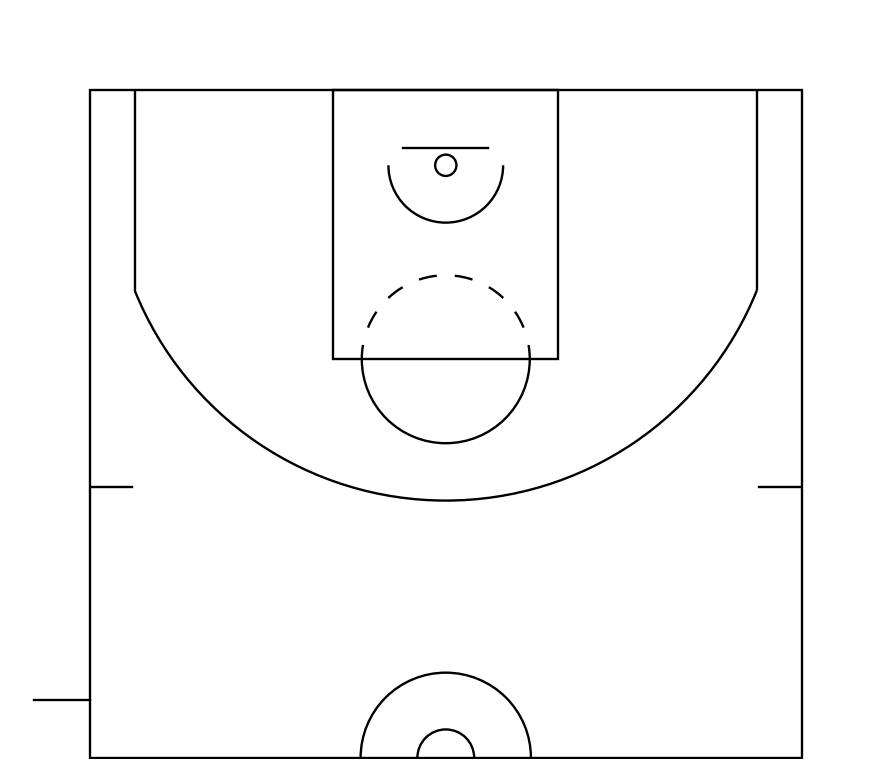

In [9]:
from mplbasketball import Court

court = Court(origin="top-left")
fig, ax = court.draw(orientation="vu")

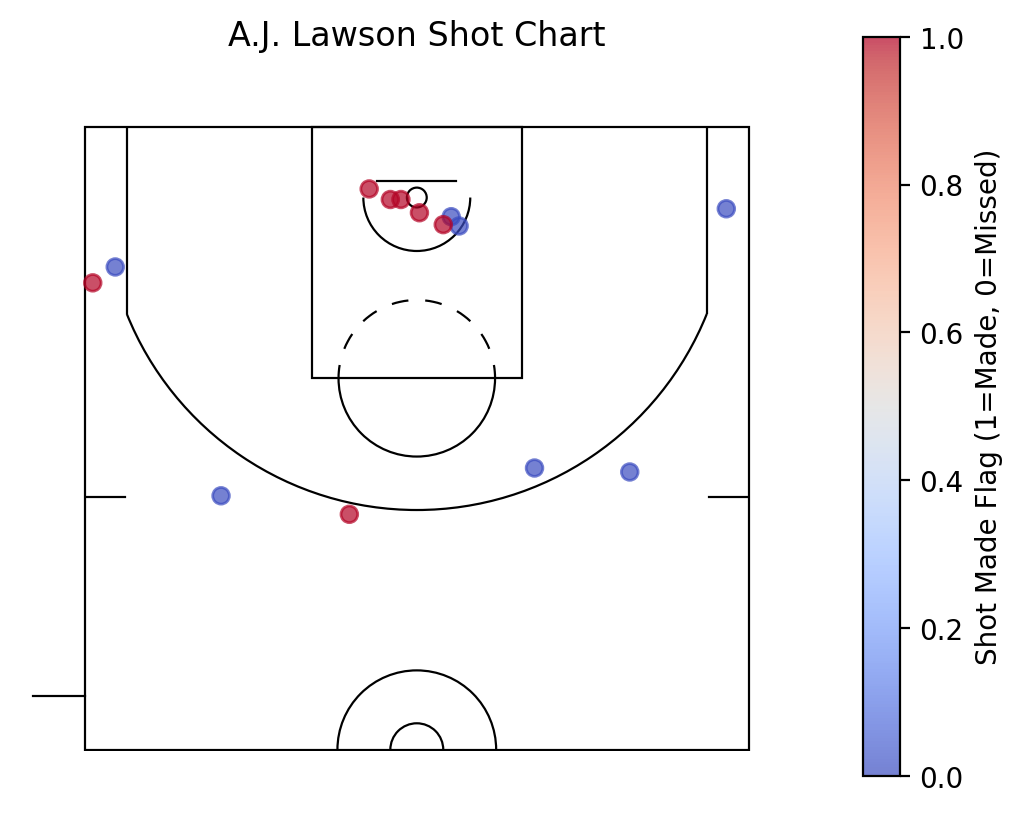

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,GameID,x_ft,y_ft,x_plot,y_plot
0,Shot Chart Detail,2022400182,11,1630639,A.J. Lawson,1612709920,Raptors 905,1,11,25,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-36,-7,1,1,20250126,LIN,RAP,2022400182,-3.6,0.7,-3.6,42.4
1,Shot Chart Detail,2022400182,21,1630639,A.J. Lawson,1612709920,Raptors 905,1,10,14,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,26,14,1,0,20250126,LIN,RAP,2022400182,2.6,-1.4,2.6,40.3
2,Shot Chart Detail,2022400182,25,1630639,A.J. Lawson,1612709920,Raptors 905,1,9,43,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,24,-51,239,1,1,20250126,LIN,RAP,2022400182,-5.1,-23.9,-5.1,17.8
3,Shot Chart Detail,2022400182,47,1630639,A.J. Lawson,1612709920,Raptors 905,1,7,11,Missed Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-228,52,1,0,20250126,LIN,RAP,2022400182,-22.8,-5.2,-22.8,36.5
4,Shot Chart Detail,2022400182,199,1630639,A.J. Lawson,1612709920,Raptors 905,2,10,58,Made Shot,Running Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-20,1,1,1,20250126,LIN,RAP,2022400182,-2.0,-0.1,-2.0,41.6
5,Shot Chart Detail,2022400182,342,1630639,A.J. Lawson,1612709920,Raptors 905,2,2,50,Missed Shot,Floating Jump shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,32,21,1,0,20250126,LIN,RAP,2022400182,3.2,-2.1,3.2,39.6
6,Shot Chart Detail,2022400182,347,1630639,A.J. Lawson,1612709920,Raptors 905,2,2,20,Missed Shot,Step Back Jump shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,234,8,1,0,20250126,LIN,RAP,2022400182,23.4,-0.8,23.4,40.9
7,Shot Chart Detail,2022400182,354,1630639,A.J. Lawson,1612709920,Raptors 905,2,1,49,Made Shot,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-12,1,1,1,20250126,LIN,RAP,2022400182,-1.2,-0.1,-1.2,41.6
8,Shot Chart Detail,2022400182,402,1630639,A.J. Lawson,1612709920,Raptors 905,3,9,59,Missed Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,22,89,204,1,0,20250126,LIN,RAP,2022400182,8.9,-20.4,8.9,21.3
9,Shot Chart Detail,2022400182,447,1630639,A.J. Lawson,1612709920,Raptors 905,3,7,40,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-148,225,1,0,20250126,LIN,RAP,2022400182,-14.8,-22.5,-14.8,19.2


In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.transforms as transforms

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400182"
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# --- 1) Convert from tenths of a foot to feet
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# --- 2) (Optional) Flip Y if data is left-handed
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# --- 3) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# --- 4) Plot with mplbasketball
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

scatter = ax.scatter(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    c=all_shotchart_df["SHOT_MADE_FLAG"],
    cmap="coolwarm",
    alpha=0.7
)
plt.colorbar(scatter, label="Shot Made Flag (1=Made, 0=Missed)")
plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Chart")
plt.show()

all_shotchart_df

## Shot Density

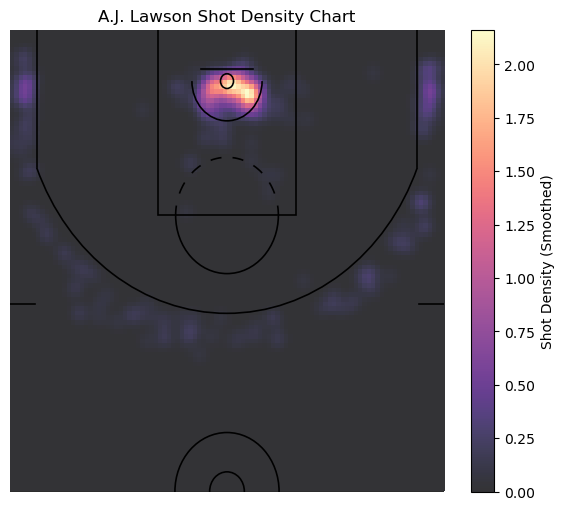

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import numpy as np
from scipy.ndimage import gaussian_filter

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGA",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    resp = requests.get(url, headers=headers, params=params)
    if resp.status_code == 200:
        data = resp.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {resp.status_code}")

if not all_shotchart_data:
    raise ValueError("No data retrieved.")

all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA
# -------------------------------------------------------------------------
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. BUILD A SMOOTH HEATMAP OVER HALF-COURT RANGE
#    (x in [-25, 25], y in [0, 47])
# -------------------------------------------------------------------------
xvals = all_shotchart_df["x_plot"].values
yvals = all_shotchart_df["y_plot"].values

# We'll clamp the histogram to the standard half-court range:
x_min, x_max = -25, 25
y_min, y_max = 0, 47

# Create bin edges
xbins = np.linspace(x_min, x_max, 101)  # 100 bins in x
ybins = np.linspace(y_min, y_max, 101)  # 100 bins in y

# Build a 2D histogram for shot density
heatmap, _, _ = np.histogram2d(xvals, yvals, bins=[xbins, ybins])

# Smooth the histogram with a Gaussian filter
heatmap_smooth = gaussian_filter(heatmap, sigma=1.5)

# -------------------------------------------------------------------------
# 4. PLOT THE SMOOTH HEATMAP
# -------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 6))

# Draw the half-court with center origin, top half orientation
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax, orientation="vu")

# Show the smoothed heatmap with matching extent
extent = [x_min, x_max, y_min, y_max]
im = ax.imshow(
    heatmap_smooth.T,
    extent=extent,
    origin="lower",
    cmap="magma",
    alpha=0.8,
    aspect="auto"
)

# Force the axes to match the half-court range
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Colorbar
cb = plt.colorbar(im, ax=ax)
cb.set_label("Shot Density (Smoothed)")

ax.set_xlabel("X (ft)")
ax.set_ylabel("Y (ft)")
ax.set_title("A.J. Lawson Shot Density Chart")

plt.show()

## Hexbin Plot

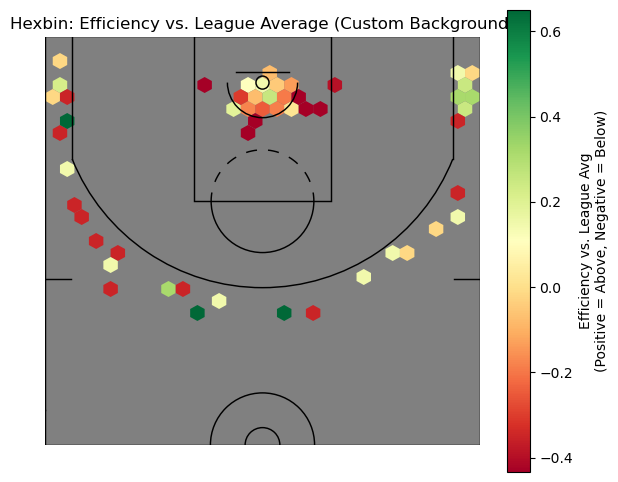

In [26]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplbasketball import Court
from matplotlib import colormaps
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344", "2022400331", "2022400303", "2022400287", "2022400277",
    "2022400247", "2022400235", "2022400223", "2022400210", "2022400198",
    "2022400182", "2022400166", "2022400153", "2022400140", "2022400122",
    "2022400108", "2022400095", "2022400087", "2022400056", "2022400047",
    "2022400021", "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

base_params = {
    "AheadBehind": "", "CFID": "", "CFPARAMS": "", "ClutchTime": "", "Conference": "",
    "ContextFilter": "", "ContextMeasure": "FGM", "DateFrom": "", "DateTo": "",
    "Division": "", "EndPeriod": 10, "EndRange": 28800, "GROUP_ID": "", "GameEventID": "",
    "GameSegment": "", "GroupID": "", "GroupMode": "", "GroupQuantity": 5,
    "LastNGames": 0, "LeagueID": "20", "Location": "", "Month": 0, "OnOff": "",
    "OpponentTeamID": 0, "Outcome": "", "PORound": 0, "Period": 0,
    "PlayerID": 1630639,  # Example Player ID
    "Season": "2024-25", "SeasonType": "Regular Season", "ShotClockRange": "",
    "StartPeriod": 1, "StartRange": 0, "StarterBench": "", "TeamID": 1612709920,
    "VsConference": "", "VsDivision": "", "VsPlayerID1": "", "VsPlayerID2": "",
    "VsPlayerID3": "", "VsPlayerID4": "", "VsPlayerID5": "", "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    resp = requests.get(url, headers=headers, params=params)
    if resp.status_code == 200:
        data = resp.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {resp.status_code}")

if not all_shotchart_data:
    raise ValueError("No data retrieved.")

all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA FOR HALF-COURT
# -------------------------------------------------------------------------
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = -all_shotchart_df["LOC_Y"] / 10.0
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. CALCULATE EFFICIENCY VS. LEAGUE AVERAGE PER ZONE
# -------------------------------------------------------------------------
def create_zone_label(row):
    if row["SHOT_ZONE_BASIC"] == "Mid-Range":
        return f"{row['SHOT_ZONE_BASIC']} ({row['SHOT_ZONE_RANGE']}) - {row['SHOT_ZONE_AREA']}"
    else:
        return f"{row['SHOT_ZONE_BASIC']} - {row['SHOT_ZONE_AREA']}"

all_shotchart_df["Zone_Label"] = all_shotchart_df.apply(create_zone_label, axis=1)

league_avgs = {
    "Restricted Area - Center(C)": 0.578,
    "In The Paint (Non-RA) - Center(C)": 0.434,
    "Mid-Range (8-16 ft.) - Left Side": 0.388,
    "Mid-Range (8-16 ft.) - Right Side": 0.377,
    "Mid-Range (16-24 ft.) - Right Side": 0.360,
    "Mid-Range (16-24 ft.) - Right Side Center": 0.394,
    "Left Corner 3 - Left Side": 0.367,
    "Right Corner 3 - Right Side": 0.381,
    "Above the Break 3 - Left Side Center": 0.338,
    "Above the Break 3 - Right Side Center": 0.347,
    "Above the Break 3 - Center": 0.346
}
all_shotchart_df["League_Avg"] = all_shotchart_df["Zone_Label"].map(league_avgs).fillna(0.35)
all_shotchart_df["EffDiff"] = all_shotchart_df["SHOT_MADE_FLAG"] - all_shotchart_df["League_Avg"]

# -------------------------------------------------------------------------
# HEXBIN PLOT: FINAL FIX TO FORCE A CUSTOM BACKGROUND
# -------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 6))

# Draw the half-court.
court = Court(court_type="nba", origin="center", units="ft")

# Define half-court bounds.
x_min, x_max = -25, 25
y_min, y_max = 0, 47

# ✅ **STEP 1: MANUALLY FILL BACKGROUND WITH A SOLID COLOR**
background_color = ""  # Change this to any color you prefer

ax.set_facecolor(background_color)  # Sets the overall plot background
ax.add_patch(patches.Rectangle(
    (x_min, y_min),  # Bottom-left corner
    x_max - x_min,   # Width
    y_max - y_min,   # Height
    color=background_color,  # The actual background color
    zorder=-3  # Ensures it stays at the very bottom
))

# ✅ **STEP 2: COMPUTE HEXBIN WITHOUT FILLING EMPTY BINS**
xvals = all_shotchart_df["x_plot"].values
yvals = all_shotchart_df["y_plot"].values
eff_diff = all_shotchart_df["EffDiff"].values

# Mask NaNs in EffDiff to ensure missing values don't get a color
eff_diff_masked = np.ma.masked_invalid(eff_diff)

hb = ax.hexbin(
    xvals,
    yvals,
    C=eff_diff_masked,  # Masked array ensures only valid bins get colors
    gridsize=30,
    extent=(x_min, x_max, y_min, y_max),
    reduce_C_function=np.mean,
    cmap="RdYlGn",  # Keep shots in the original diverging colormap
    mincnt=1,  # Ensures only bins with data are drawn
    edgecolors="none",  # Removes unwanted hexbin borders
    linewidths=0.5,  # Ensures proper hexbin rendering
    alpha=1.0,  # Ensure hexbin is fully opaque so it does not interfere with the background
    zorder=-1  # Keeps hexbin below court lines but above background
)

# ✅ **STEP 3: REDRAW COURT LINES TO ENSURE VISIBILITY**
court.draw(ax=ax, orientation="vu")

# ✅ **STEP 4: FINAL ADJUSTMENTS (ENSURES PROPER DISPLAY)**
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Add colorbar
cb = plt.colorbar(hb, ax=ax)
cb.set_label("Efficiency vs. League Avg\n(Positive = Above, Negative = Below)")

# Labels and title
ax.set_xlabel("X (ft)")
ax.set_ylabel("Y (ft)")
ax.set_title("Hexbin: Efficiency vs. League Average (Custom Background)")

plt.show()

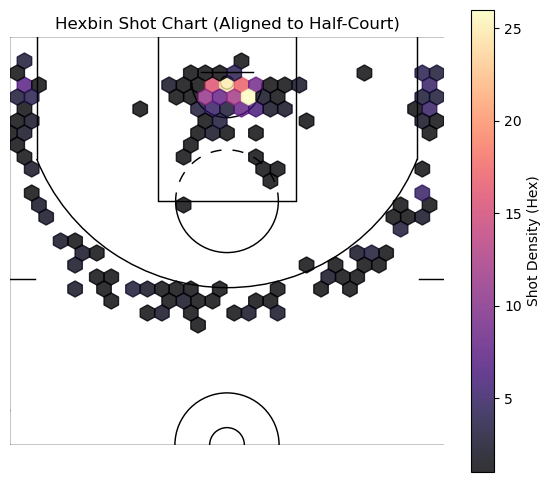

In [31]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplbasketball import Court

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001"
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,      # Example Player ID
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,     # Example Team ID
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    resp = requests.get(url, headers=headers, params=params)
    if resp.status_code == 200:
        data = resp.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {resp.status_code}")

if not all_shotchart_data:
    raise ValueError("No data retrieved.")

all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA TO MATCH THE HALF-COURT COORDINATES
# -------------------------------------------------------------------------
# Convert from tenths of a foot to feet
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# Flip Y if data is left-handed (so y increases upward)
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. CREATE A HEXBIN PLOT ALIGNED TO THE HALF-COURT
# -------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 6))

# Draw the half-court (NBA, center origin, vertical up orientation)
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax, orientation="vu")

# Define the half-court bounds: x in [-25, 25], y in [0, 47]
x_min, x_max = -25, 25
y_min, y_max = 0, 47

# Create a hexbin of shot density
hb = ax.hexbin(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    gridsize=30,       # sets the resolution of the hex bins
    extent=(x_min, x_max, y_min, y_max),
    cmap="magma",      # choose your colormap
    mincnt=1,          # only show bins with >=1 shot
    alpha=0.8
)

# Enforce the same coordinate limits as the drawn court
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Add a colorbar
cb = plt.colorbar(hb, ax=ax)
cb.set_label("Shot Density (Hex)")

ax.set_xlabel("X (ft)")
ax.set_ylabel("Y (ft)")
ax.set_title("Hexbin Shot Chart (Aligned to Half-Court)")

plt.show()

In [9]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        inner_line_1 = Rectangle((40, 69.28), 80, 0, angle=60, linewidth=lw, color=color)
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, angle=120, linewidth=lw, color=color)
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, angle=70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, angle=109.47, linewidth=lw, color=color)
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, angle=35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, angle=144.68, linewidth=lw, color=color)

        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

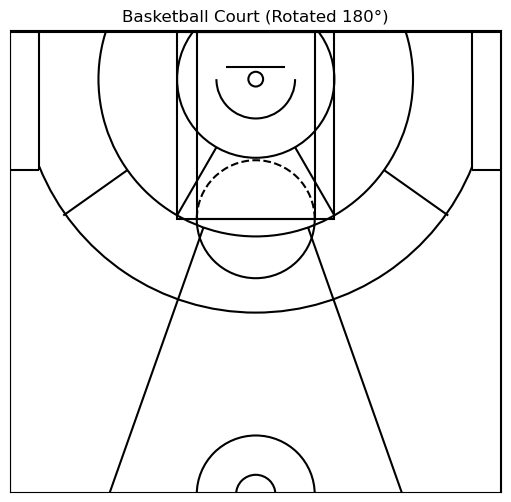

In [12]:
import matplotlib.pyplot as plt

# Create a new figure
fig, ax = plt.subplots(figsize=(7, 6))

# Call the function to draw the court
draw_court(ax, color="black", lw=1.5, shotzone=True, outer_lines=True)

# ✅ Flip the court 180 degrees by reversing xlim and ylim
ax.set_xlim(250, -250)  # Flip X-axis
ax.set_ylim(420, -50)   # Flip Y-axis

# ✅ Ensure aspect ratio remains correct
ax.set_aspect("equal")

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])

# Set title
ax.set_title("Basketball Court (Rotated 180°)")

# Show the rotated court
plt.show()

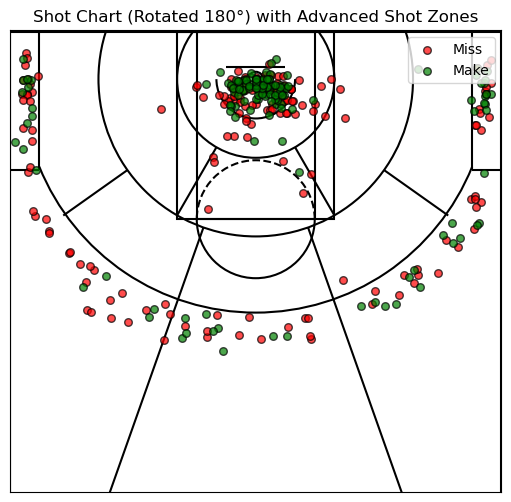

In [11]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Arc

# -------------------------------------------------------------------------
# 1. DRAW THE COURT FUNCTION (WITH ADVANCED SHOT ZONES)
# -------------------------------------------------------------------------
def draw_court(ax=None, color="black", lw=1.5, shotzone=False, outer_lines=True):
    """Draws an NBA court with optional shot zones."""
    if ax is None:
        ax = plt.gca()

    # Create various court elements
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a, corner_three_b, three_arc]

    # Draw shot zones if enabled
    if shotzone:
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x = Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        inner_line_1 = Rectangle((40, 69.28), 80, 0, angle=60, linewidth=lw, color=color)
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, angle=120, linewidth=lw, color=color)
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, angle=70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, angle=109.47, linewidth=lw, color=color)
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, angle=35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, angle=144.68, linewidth=lw, color=color)

        court_elements.extend([inner_circle, outer_circle, corner_three_a_x, corner_three_b_x,
                               inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6])

    # Add out-of-bounds lines
    if outer_lines:
        court_boundary = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(court_boundary)

    # Add court elements to the plot
    for element in court_elements:
        ax.add_patch(element)

    return ax

# -------------------------------------------------------------------------
# 2. RETRIEVE SHOT DATA
# -------------------------------------------------------------------------
game_ids = ["2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001"]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {"User-Agent": "Mozilla/5.0"}

params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,      # Example Player ID
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,     # Example Team ID
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shots = []
for game_id in game_ids:
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        df_game = pd.DataFrame(shot_data["rowSet"], columns=shot_data["headers"])
        df_game["GameID"] = game_id
        all_shots.append(df_game)

if all_shots:
    shots_df = pd.concat(all_shots, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# -------------------------------------------------------------------------
# 3. PROCESS SHOT DATA AND ADJUST COORDINATES
# -------------------------------------------------------------------------

# Convert shot coordinates to match the court
shots_df["x_ft"] = shots_df["LOC_X"]
shots_df["y_ft"] = -shots_df["LOC_Y"]

# Adjust so basket is at (0,0)
shots_df["x_plot"] = shots_df["x_ft"]
shots_df["y_plot"] = shots_df["y_ft"]

# ✅ Rotate shot locations 180° to match the rotated court
shots_df["x_plot"] = -shots_df["x_plot"]
shots_df["y_plot"] = -shots_df["y_plot"]

# Separate makes and misses
shots_df["SHOT_MADE_FLAG"] = shots_df["EVENT_TYPE"].apply(lambda x: 1 if x == "Made Shot" else 0)
made_shots = shots_df[shots_df["SHOT_MADE_FLAG"] == 1]
missed_shots = shots_df[shots_df["SHOT_MADE_FLAG"] == 0]

# -------------------------------------------------------------------------
# 4. PLOT COURT WITH SHOTS
# -------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(7, 6))

# Draw the court
draw_court(ax, color="black", lw=1.5, shotzone=True, outer_lines=True)

# ✅ Flip the court 180° by reversing xlim and ylim
ax.set_xlim(250, -250)  # Flip X-axis
ax.set_ylim(420, -50)   # Flip Y-axis

# ✅ Plot shots
ax.scatter(missed_shots["x_plot"], missed_shots["y_plot"], color="red", edgecolors="black", label="Miss", s=30, alpha=0.7)
ax.scatter(made_shots["x_plot"], made_shots["y_plot"], color="green", edgecolors="black", label="Make", s=30, alpha=0.7)

# ✅ Ensure correct aspect ratio
ax.set_aspect("equal")

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])

# Add legend
ax.legend(loc="upper right")

# Set title
ax.set_title("Shot Chart (Rotated 180°) with Advanced Shot Zones")

# Show plot
plt.show()

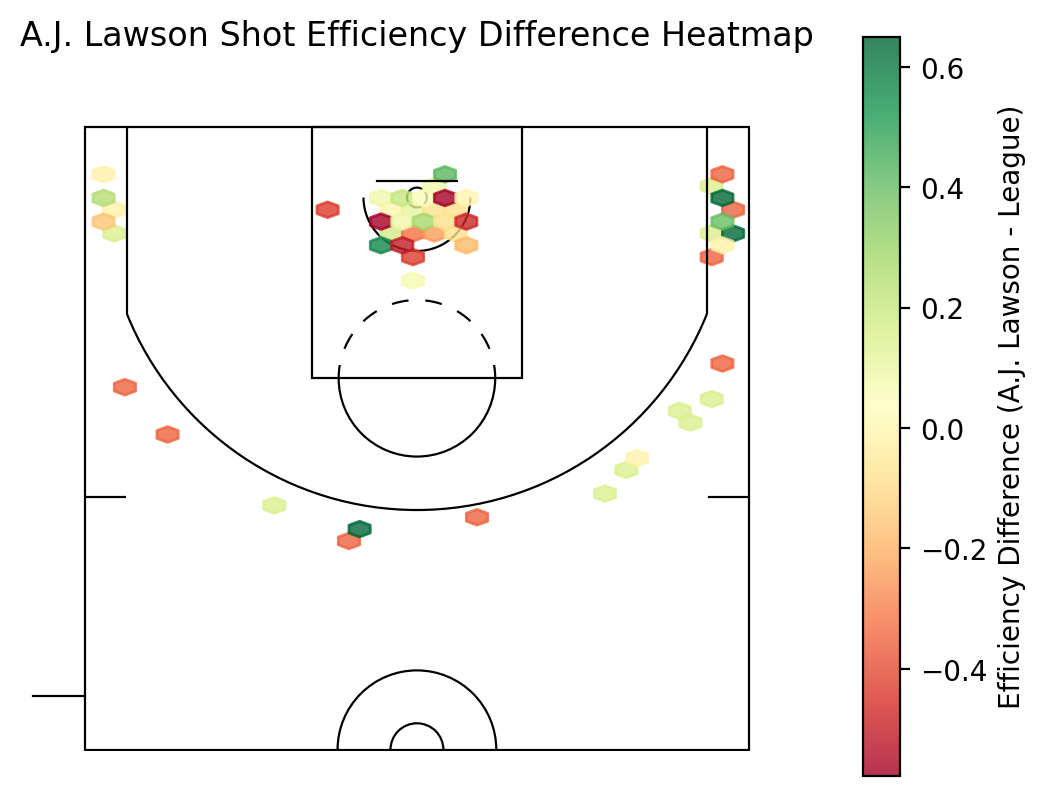

In [56]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
from matplotlib import colormaps

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------

game_ids = [
    "2022400344", "2022400331", "2022400303", "2022400287", "2022400277",
    "2022400247", "2022400235", "2022400223", "2022400210", "2022400198",
    "2022400182", "2022400166", "2022400153", "2022400140", "2022400122",
    "2022400108", "2022400095", "2022400087", "2022400056", "2022400047",
    "2022400021", "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGA",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# -------------------------------------------------------------------------
# 2. PROCESS SHOT DATA: ENSURE ALL SHOTS ARE ACCOUNTED FOR
# -------------------------------------------------------------------------

# Ensure SHOT_ATTEMPTED_FLAG exists and is not NaN
all_shotchart_df["SHOT_ATTEMPTED_FLAG"] = all_shotchart_df["SHOT_ATTEMPTED_FLAG"].fillna(0)

# Create SHOT_MADE_FLAG column based on both EVENT_TYPE and SHOT_ATTEMPTED_FLAG
all_shotchart_df["SHOT_MADE_FLAG"] = all_shotchart_df.apply(
    lambda row: 1 if row["EVENT_TYPE"] == "Made Shot" and row["SHOT_ATTEMPTED_FLAG"] == 1 else 0, axis=1
)

# Filter to ensure only attempted shots are included
all_shotchart_df = all_shotchart_df[all_shotchart_df["SHOT_ATTEMPTED_FLAG"] == 1]

# Convert shot coordinates to match `mplbasketball`
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = -all_shotchart_df["LOC_Y"] / 10.0
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. CALCULATE EFFICIENCY VS. LEAGUE AVERAGE FOR EACH ZONE
# -------------------------------------------------------------------------

# Define league averages per zone
league_avgs = {
    "Restricted Area - Center(C)": 0.578,
    "In The Paint (Non-RA) - Center(C)": 0.434,
    "Mid-Range (8-16 ft.) - Left Side": 0.388,
    "Mid-Range (8-16 ft.) - Right Side": 0.377,
    "Mid-Range (16-24 ft.) - Right Side": 0.360,
    "Mid-Range (16-24 ft.) - Right Side Center": 0.394,
    "Left Corner 3 - Left Side": 0.367,
    "Right Corner 3 - Right Side": 0.381,
    "Above the Break 3 - Left Side Center": 0.338,
    "Above the Break 3 - Right Side Center": 0.347,
    "Above the Break 3 - Center": 0.346
}

# Assign league averages to each shot based on its zone
all_shotchart_df["Zone_Label"] = all_shotchart_df["SHOT_ZONE_BASIC"] + " - " + all_shotchart_df["SHOT_ZONE_AREA"]
all_shotchart_df["League_Avg"] = all_shotchart_df["Zone_Label"].map(league_avgs).fillna(0.35)

# Compute efficiency difference: (Player FG% - League FG%)
all_shotchart_df["EffDiff"] = all_shotchart_df["SHOT_MADE_FLAG"] - all_shotchart_df["League_Avg"]

# -------------------------------------------------------------------------
# 4. PLOT SHOT EFFICIENCY HEATMAP
# -------------------------------------------------------------------------

court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

hb = ax.hexbin(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    C=all_shotchart_df["EffDiff"],
    gridsize=30,
    reduce_C_function=lambda x: np.mean(x),
    cmap="RdYlGn",
    mincnt=1,
    alpha=0.8
)

cb = plt.colorbar(hb, ax=ax)
cb.set_label("Efficiency Difference (A.J. Lawson - League)")

plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Efficiency Difference Heatmap")
plt.show()

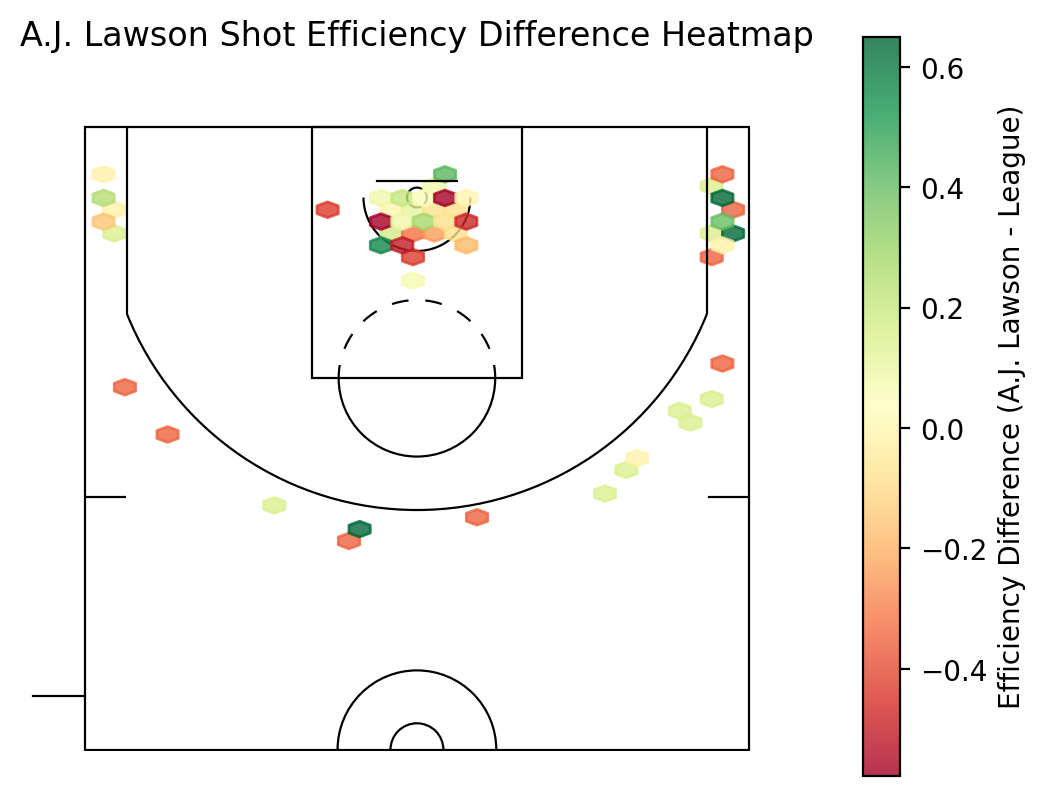

In [53]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
from matplotlib import colormaps

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGA",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")
    
all_shotchart_df["Zone_Label"] = all_shotchart_df.apply(create_zone_label, axis=1)    
    
    # Group by Zone_Label and tally makes and attempts.
zone_summary = all_shotchart_df.groupby("Zone_Label").agg(
    makes=("SHOT_MADE_FLAG", "sum"),
    attempts=("SHOT_MADE_FLAG", "count")
).reset_index()

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA TO MATCH MPLBASKETBALL'S COORDINATES
# -------------------------------------------------------------------------
# 2a) Convert from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# 2b) Flip Y if data is left-handed (so y increases upward).
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# 2c) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. CREATE A HEATMAP OF THE SHOT DATA
# -------------------------------------------------------------------------

# Define a dictionary of league averages (in decimal form) for each zone.
league_avgs = {
    "Restricted Area - Center(C)": 0.578,
    "In The Paint (Non-RA) - Center(C)": 0.434,
    "Mid-Range (8-16 ft.) - Left Side": 0.388,
    "Mid-Range (8-16 ft.) - Right Side": 0.377,
    "Mid-Range (16-24 ft.) - Right Side": 0.360,
    "Mid-Range (16-24 ft.) - Right Side Center": 0.394,
    "Left Corner 3 - Left Side": 0.367,
    "Right Corner 3 - Right Side": 0.381,
    "Above the Break 3 - Left Side Center": 0.338,
    "Above the Break 3 - Right Side Center": 0.347,
    "Above the Break 3 - Center": 0.346
}
# Map each shot's Zone_Label to its league average.
all_shotchart_df["League_Avg"] = all_shotchart_df["Zone_Label"].map(league_avgs)
# For any zone not found in our dictionary, default to 0.35.
all_shotchart_df["League_Avg"].fillna(0.35, inplace=True)

# Compute efficiency difference: (SHOT_MADE_FLAG - League_Avg)
all_shotchart_df["EffDiff"] = all_shotchart_df["SHOT_MADE_FLAG"] - all_shotchart_df["League_Avg"]

# -------------------------------------------------------------------------
# 4. CREATE A HEATMAP OF EFFICIENCY DIFFERENCE
# -------------------------------------------------------------------------
# This heatmap will show, for each bin, the average difference between A.J. Lawson's
# efficiency and the league average for that zone.

court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

hb = ax.hexbin(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    C=all_shotchart_df["EffDiff"],
    gridsize=30,
    reduce_C_function=lambda x: np.mean(x),
    cmap="RdYlGn",
    mincnt=1,
    alpha=0.8
)

cb = plt.colorbar(hb, ax=ax)
cb.set_label("Efficiency Difference (A.J. Lawson - League)")

plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Efficiency Difference Heatmap")
plt.show()

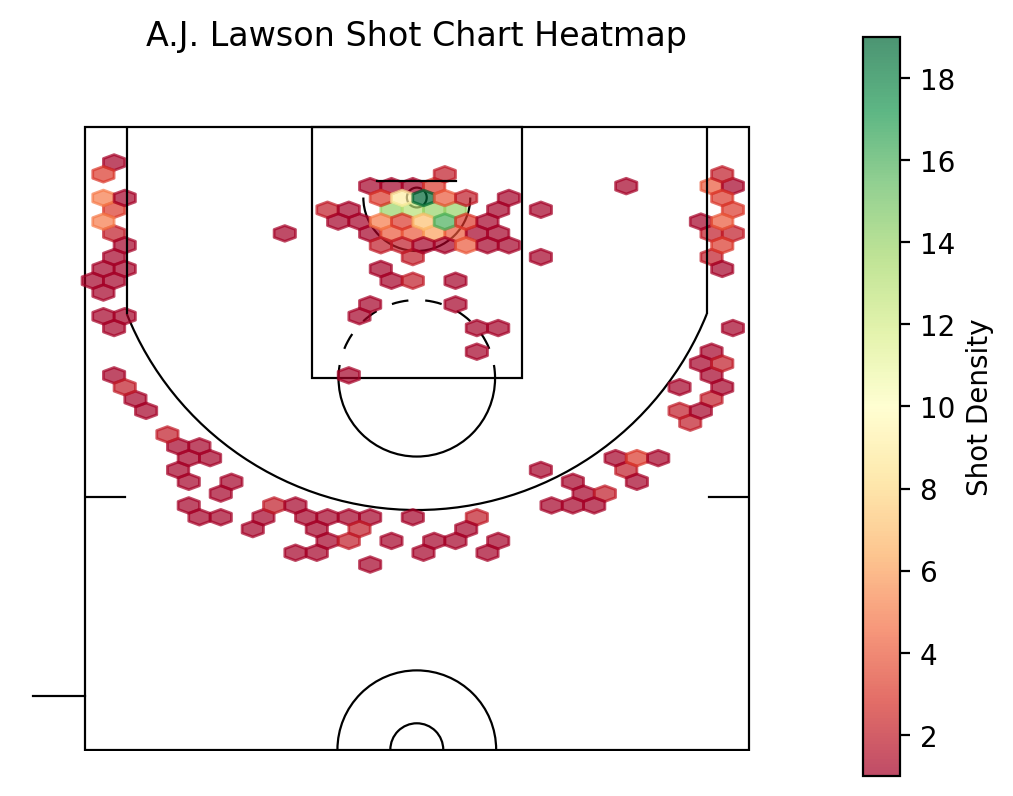

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
from matplotlib import colormaps

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA TO MATCH MPLBASKETBALL'S COORDINATES
# -------------------------------------------------------------------------
# 2a) Convert from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# 2b) Flip Y if data is left-handed (so y increases upward).
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# 2c) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. CREATE A HEATMAP OF THE SHOT DATA
# -------------------------------------------------------------------------
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

# Use a hexbin plot to create a heatmap. Adjust gridsize as desired.
hb = ax.hexbin(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    gridsize=30,
    cmap="RdYlGn",
    mincnt=1,
    alpha=0.7
)

cb = plt.colorbar(hb, ax=ax)
cb.set_label("Shot Density")

plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Chart Heatmap")
plt.show()

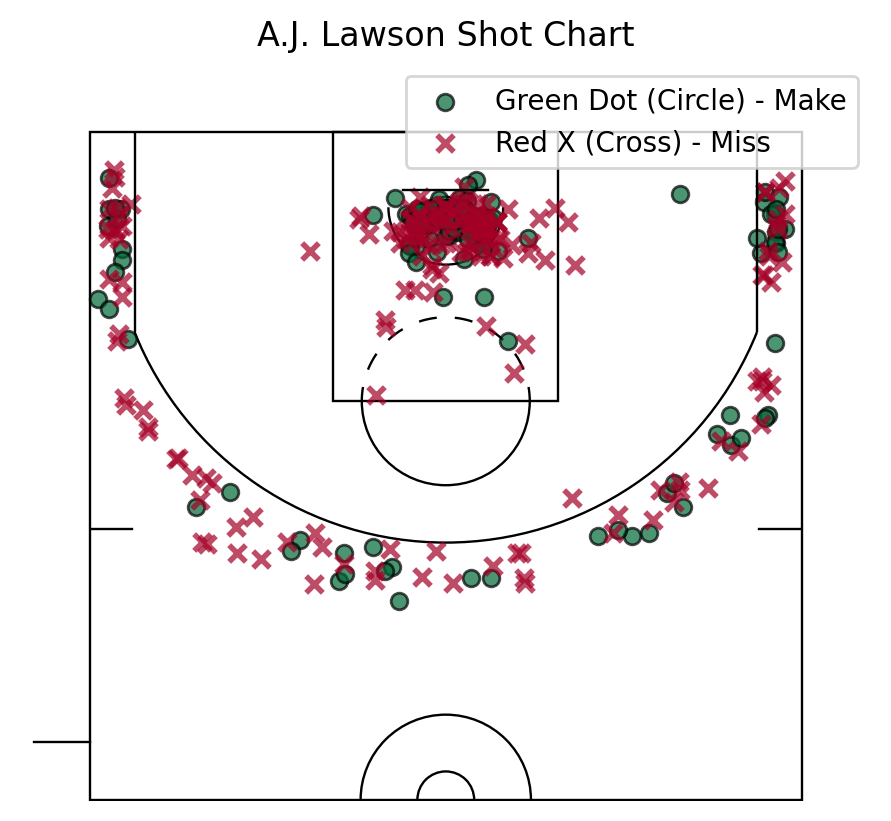

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,GameID,x_ft,y_ft,x_plot,y_plot
0,Shot Chart Detail,2022400344,24,1630639,A.J. Lawson,1612709920,Raptors 905,1,10,19,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-136,218,1,0,20250228,WIS,RAP,2022400344,-13.6,-21.8,-13.6,19.9
1,Shot Chart Detail,2022400344,120,1630639,A.J. Lawson,1612709920,Raptors 905,1,2,1,Missed Shot,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,11,31,1,0,20250228,WIS,RAP,2022400344,1.1,-3.1,1.1,38.6
2,Shot Chart Detail,2022400344,142,1630639,A.J. Lawson,1612709920,Raptors 905,1,0,22,Made Shot,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-12,22,1,1,20250228,WIS,RAP,2022400344,-1.2,-2.2,-1.2,39.5
3,Shot Chart Detail,2022400344,147,1630639,A.J. Lawson,1612709920,Raptors 905,1,0,2,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,239,4,1,0,20250228,WIS,RAP,2022400344,23.9,-0.4,23.9,41.3
4,Shot Chart Detail,2022400344,193,1630639,A.J. Lawson,1612709920,Raptors 905,2,9,17,Made Shot,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-6,5,1,1,20250228,WIS,RAP,2022400344,-0.6,-0.5,-0.6,41.2
5,Shot Chart Detail,2022400344,197,1630639,A.J. Lawson,1612709920,Raptors 905,2,8,36,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,107,231,1,1,20250228,WIS,RAP,2022400344,10.7,-23.1,10.7,18.6
6,Shot Chart Detail,2022400344,221,1630639,A.J. Lawson,1612709920,Raptors 905,2,7,3,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,2,8,1,1,20250228,WIS,RAP,2022400344,0.2,-0.8,0.2,40.9
7,Shot Chart Detail,2022400344,319,1630639,A.J. Lawson,1612709920,Raptors 905,2,0,25,Made Shot,Running Alley Oop Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,5,3,1,1,20250228,WIS,RAP,2022400344,0.5,-0.3,0.5,41.4
8,Shot Chart Detail,2022400344,427,1630639,A.J. Lawson,1612709920,Raptors 905,3,4,7,Missed Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,13,1,0,20250228,WIS,RAP,2022400344,-22.8,-1.3,-22.8,40.4
9,Shot Chart Detail,2022400344,443,1630639,A.J. Lawson,1612709920,Raptors 905,3,2,57,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,10,15,1,1,20250228,WIS,RAP,2022400344,1.0,-1.5,1.0,40.2


In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
from matplotlib import colormaps

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA TO MATCH MPLBASKETBALL'S COORDINATES
# -------------------------------------------------------------------------
# 2a) Convert from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# 2b) Flip Y if data is left-handed (so y increases upward).
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# 2c) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. PLOT THE SHOT DATA ON THE MPLBASKETBALL COURT WITH A CUSTOM LEGEND
# -------------------------------------------------------------------------
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

# Use the RdYlGn colormap to get our desired colors.
cmap = colormaps["RdYlGn"]
# For SHOT_MADE_FLAG, we map 1 to green and 0 to red.
color_make = cmap(1.0)   # green end
color_miss = cmap(0.0)   # red end

# Separate made and missed shots.
df_made = all_shotchart_df[all_shotchart_df["SHOT_MADE_FLAG"] == 1]
df_missed = all_shotchart_df[all_shotchart_df["SHOT_MADE_FLAG"] == 0]

# Plot made shots as circles using the RdYlGn color for makes.
ax.scatter(
    df_made["x_plot"],
    df_made["y_plot"],
    marker='o',
    color=color_make,
    edgecolor="black",
    alpha=0.7,
    label="Green Dot (Circle) - Make"
)

# Plot missed shots as X's using the RdYlGn color for misses.
ax.scatter(
    df_missed["x_plot"],
    df_missed["y_plot"],
    marker='x',
    color=color_miss,
    linewidths=2,
    alpha=0.7,
    label="Red X (Cross) - Miss"
)

ax.legend(loc="upper right")
plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Chart")
plt.show()

#all_shotchart_df

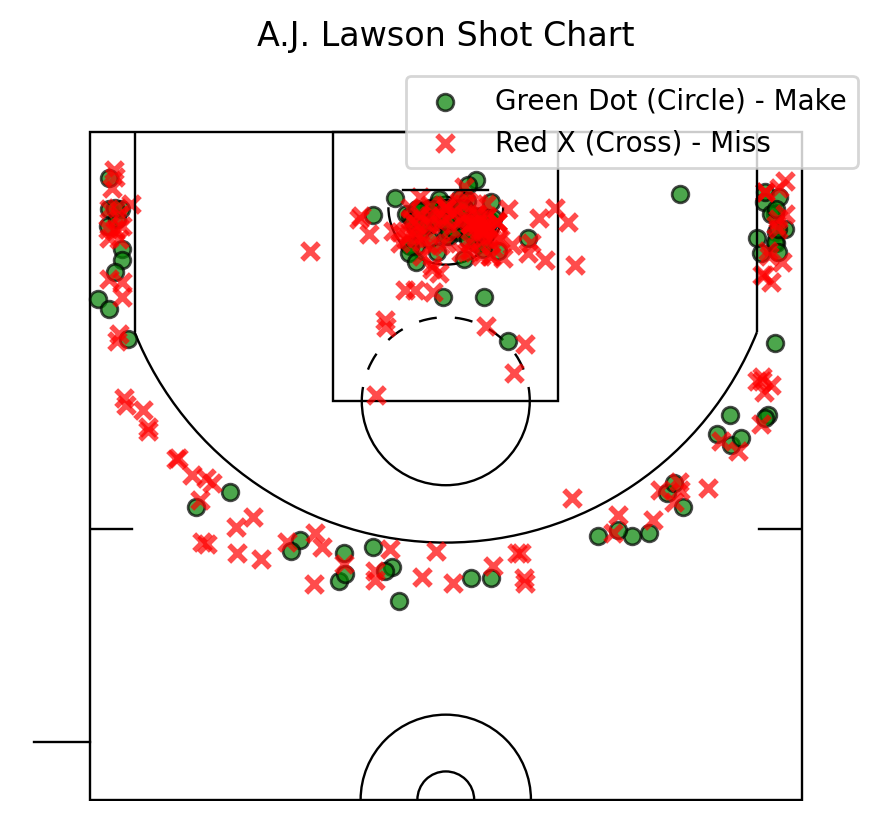

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# -------------------------------------------------------------------------
# 2. NORMALIZE THE SHOT DATA TO MATCH MPLBASKETBALL'S COORDINATES
# -------------------------------------------------------------------------
# 2a) Convert from tenths of a foot to feet.
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# 2b) Flip Y if data is left-handed (so y increases upward).
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# 2c) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# -------------------------------------------------------------------------
# 3. PLOT THE SHOT DATA ON THE MPLBASKETBALL COURT WITH A CUSTOM LEGEND
# -------------------------------------------------------------------------
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

# Separate made and missed shots.
df_made = all_shotchart_df[all_shotchart_df["SHOT_MADE_FLAG"] == 1]
df_missed = all_shotchart_df[all_shotchart_df["SHOT_MADE_FLAG"] == 0]

# Plot made shots as green circles.
ax.scatter(
    df_made["x_plot"],
    df_made["y_plot"],
    marker='o',
    color="green",
    edgecolor="black",
    alpha=0.7,
    label="Green Dot (Circle) - Make"
)

# Plot missed shots as red X's.
ax.scatter(
    df_missed["x_plot"],
    df_missed["y_plot"],
    marker='x',
    color="red",
    linewidths=2,
    alpha=0.7,
    label="Red X (Cross) - Miss"
)

ax.legend(loc="upper right")
plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Chart")
plt.show()

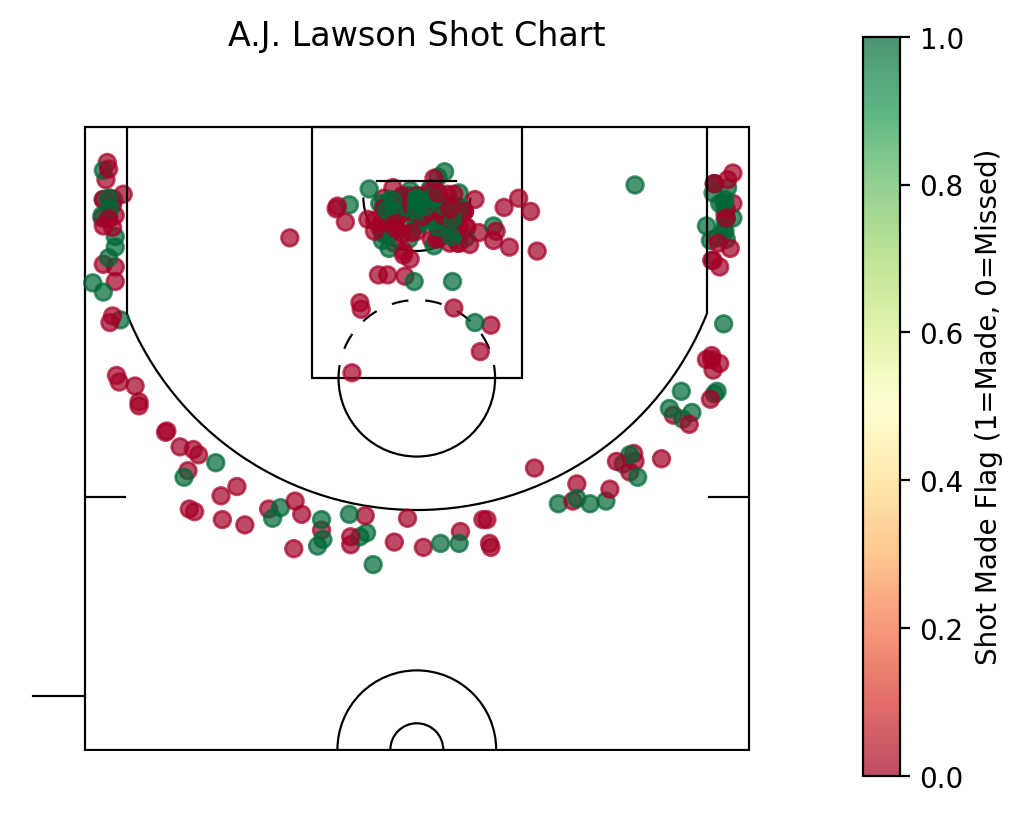

In [50]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.transforms as transforms

# -------------------------------------------------------------------------
# 1. RETRIEVE YOUR SHOT DATA
# -------------------------------------------------------------------------
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

url = "https://stats.gleague.nba.com/stats/shotchartdetail"
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/91.0.4472.124 Safari/537.36"
    ),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

all_shotchart_data = []
for game_id in game_ids:
    params = base_params.copy()
    params["GameID"] = game_id
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
else:
    raise ValueError("No data retrieved.")

# --- 1) Convert from tenths of a foot to feet
all_shotchart_df["x_ft"] = all_shotchart_df["LOC_X"] / 10.0
all_shotchart_df["y_ft"] = all_shotchart_df["LOC_Y"] / 10.0

# --- 2) (Optional) Flip Y if data is left-handed
all_shotchart_df["y_ft"] = -all_shotchart_df["y_ft"]

# --- 3) Shift so that the basket is at (0, 41.7)
all_shotchart_df["x_plot"] = all_shotchart_df["x_ft"]
all_shotchart_df["y_plot"] = all_shotchart_df["y_ft"] + 41.7

# --- 4) Plot with mplbasketball
court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(orientation="vu")

scatter = ax.scatter(
    all_shotchart_df["x_plot"],
    all_shotchart_df["y_plot"],
    c=all_shotchart_df["SHOT_MADE_FLAG"],
    cmap='RdYlGn', #Coolwarm
    alpha=0.7
)
plt.colorbar(scatter, label="Shot Made Flag (1=Made, 0=Missed)")
plt.xlabel("X (ft)")
plt.ylabel("Y (ft)")
plt.title("A.J. Lawson Shot Chart")
plt.show()

           GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  PLAYER_NAME  \
0  Shot Chart Detail  2022400344             24    1630639  A.J. Lawson   
1  Shot Chart Detail  2022400344            120    1630639  A.J. Lawson   
2  Shot Chart Detail  2022400344            142    1630639  A.J. Lawson   
3  Shot Chart Detail  2022400344            147    1630639  A.J. Lawson   
4  Shot Chart Detail  2022400344            193    1630639  A.J. Lawson   

      TEAM_ID    TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  1612709920  Raptors 905       1                 10                 19   
1  1612709920  Raptors 905       1                  2                  1   
2  1612709920  Raptors 905       1                  0                 22   
3  1612709920  Raptors 905       1                  0                  2   
4  1612709920  Raptors 905       2                  9                 17   

    EVENT_TYPE                 ACTION_TYPE       SHOT_TYPE    SHOT_ZONE_BASIC  \
0  Missed S

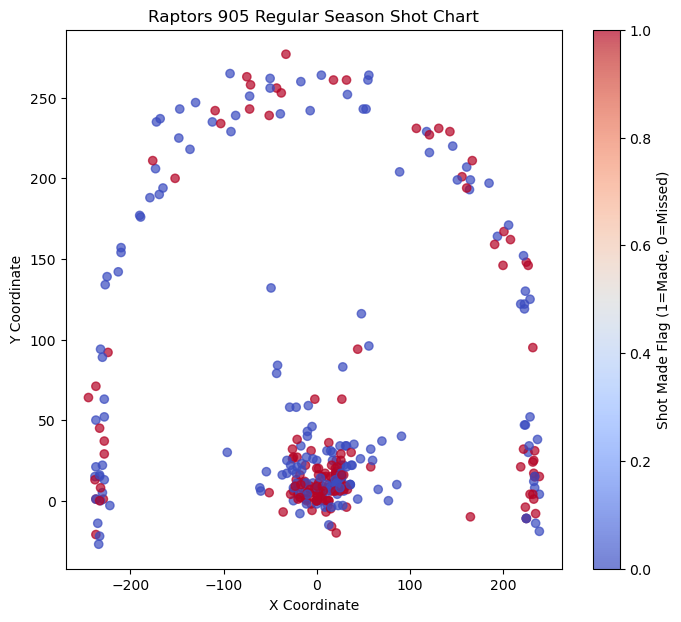

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# List of GameIDs for Raptors 905 regular season games.
# You can generate this list by scraping the team schedule or using an API endpoint that provides game logs.
game_ids = [
    "2022400344",
    "2022400331",
    "2022400303",
    "2022400287",
    "2022400277",
    "2022400247",
    "2022400235",
    "2022400223",
    "2022400210",
    "2022400198",
    "2022400182",
    "2022400166",
    "2022400153",
    "2022400140",
    "2022400122",
    "2022400108",
    "2022400095",
    "2022400087",
    "2022400056",
    "2022400047",
    "2022400021",
    "2022400001",
]

# Define the API endpoint for shot chart details
url = "https://stats.gleague.nba.com/stats/shotchartdetail"

# Define headers (same as before)
headers = {
    "Host": "stats.gleague.nba.com",
    "Connection": "keep-alive",
    "Accept": "application/json, text/plain, */*",
    "x-nba-stats-token": "true",
    "x-nba-stats-origin": "stats",
    "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                   "AppleWebKit/537.36 (KHTML, like Gecko) "
                   "Chrome/91.0.4472.124 Safari/537.36"),
    "Origin": "https://stats.gleague.nba.com",
    "Referer": "https://stats.gleague.nba.com/"
}

# Base query parameters for the request (with SeasonType as Regular Season)
base_params = {
    "AheadBehind": "",
    "CFID": "",
    "CFPARAMS": "",
    "ClutchTime": "",
    "Conference": "",
    "ContextFilter": "",
    "ContextMeasure": "FGM",
    "DateFrom": "",
    "DateTo": "",
    "Division": "",
    "EndPeriod": 10,
    "EndRange": 28800,
    "GROUP_ID": "",
    "GameEventID": "",
    "GameSegment": "",
    "GroupID": "",
    "GroupMode": "",
    "GroupQuantity": 5,
    "LastNGames": 0,
    "LeagueID": "20",
    "Location": "",
    "Month": 0,
    "OnOff": "",
    "OpponentTeamID": 0,
    "Outcome": "",
    "PORound": 0,
    "Period": 0,
    "PlayerID": 1630639,
    "PlayerID1": "",
    "PlayerID2": "",
    "PlayerID3": "",
    "PlayerID4": "",
    "PlayerID5": "",
    "PlayerPosition": "",
    "PointDiff": "",
    "Position": "",
    "RangeType": 0,
    "RookieYear": "",
    "Season": "2024-25",
    "SeasonSegment": "",
    "SeasonType": "Regular Season",
    "ShotClockRange": "",
    "StartPeriod": 1,
    "StartRange": 0,
    "StarterBench": "",
    "TeamID": 1612709920,
    "VsConference": "",
    "VsDivision": "",
    "VsPlayerID1": "",
    "VsPlayerID2": "",
    "VsPlayerID3": "",
    "VsPlayerID4": "",
    "VsPlayerID5": "",
    "VsTeamID": ""
}

# List to collect shot chart data for all games
all_shotchart_data = []

for game_id in game_ids:
    # Update the parameters with the current GameID
    params = base_params.copy()
    params["GameID"] = game_id
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        shot_data = data["resultSets"][0]
        headers_list = shot_data["headers"]
        rows = shot_data["rowSet"]
        
        # Create a DataFrame for the current game
        df_game = pd.DataFrame(rows, columns=headers_list)
        df_game["GameID"] = game_id  # Add a column to keep track of the GameID
        all_shotchart_data.append(df_game)
    else:
        print(f"Request failed for GameID {game_id} with status code {response.status_code}")

# Combine all the individual game DataFrames into one
if all_shotchart_data:
    all_shotchart_df = pd.concat(all_shotchart_data, ignore_index=True)
    print(all_shotchart_df.head())
else:
    print("No data retrieved.")

# (Optional) Example: Visualize the shot locations from all games in a single plot
plt.figure(figsize=(8, 7))
plt.scatter(all_shotchart_df["LOC_X"], all_shotchart_df["LOC_Y"],
            c=all_shotchart_df["SHOT_MADE_FLAG"], cmap="coolwarm", alpha=0.7)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Raptors 905 Regular Season Shot Chart")
plt.colorbar(label="Shot Made Flag (1=Made, 0=Missed)")
plt.show()

## Shooting

In [ ]:
from mplbasketball import Court

court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(showaxis=True)

In [ ]:
import pandas as pd

# ---- Flatten the MultiIndex DataFrames for shooting stats ----

# For shooting_stats (MeasureType: Base)
shooting_stats_flat = filtered_stats.copy()
shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip() 
    for col in filtered_stats.columns
]

desired_shooting_cols = [
    "PLAYER", "MIN", 
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

shooting_df = filtered_stats[desired_shooting_cols]

shooting_df

In [ ]:
import scipy.stats as stats

# Define the list of column names (ordered as you want them in the pizza plot)
columns_to_plot = [
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

# Extract the stats for a given player
player_name = "A.J. Lawson"  # change this to the actual player's name
player_stats = shooting_df.loc[shooting_df["PLAYER"] == player_name]

# Compute the percentile for each stat (using the merged data as the reference)
values = []
percentiles = []
for col in columns_to_plot:
    # Get the value for the specific player
    value = player_stats[col].iloc[0]
    values.append(value)
    # Calculate the percentile based on the entire column distribution
    perc = int(stats.percentileofscore(shooting_df[col].dropna(), value))
    percentiles.append(perc)

print("Values:", values)
print("Percentiles:", percentiles)

In [ ]:
from mplsoccer import PyPizza, FontManager
import matplotlib.pyplot as plt

# Define names corresponding to each stat (this list should match the order in columns_to_plot)
stat_names = [
    "Restricted Area\nFGA", "Restricted Area\nFG%", 
    "In The Paint\n(Non-RA) FGA", "In The Paint\n(Non-RA) FG%",
    "Mid-Range\nFGA", "Mid-Range\nFG%",
    "Above the Break\n3 FGA", "Above the Break\n3 FG%",
    "Corner 3\nFGA", "Corner 3\nFG%",
]

slice_colors = ["orange"] * 4 + ["yellow"] * 2 + ["green"] * 4
text_colors = ["black"]*10

# Create a PyPizza object with your desired settings
baker = PyPizza(
    params=stat_names,
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

# Create the pizza plot using the computed percentiles
fig, ax = baker.make_pizza(
    percentiles,
    figsize=(10, 10),
    param_location=110,
    slice_colors=slice_colors,
    value_colors=text_colors,
    value_bck_colors=slice_colors,
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
         va="center"
    ),
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

plt.show()

In [ ]:
# ---- Select desired columns from each DataFrame ----

desired_advanced_cols = [
    "PLAYER", "OFFRTG", "DEFRTG", "NETRTG", "AST/TO", 
    "OREB%", "DREB%", "REB%", "EFG%", "TS%", "USG%"
]

desired_defense_cols = [
    "PLAYER", "DEF WS"
]

desired_traditional_stats = ["PLAYER", "PTS"]

# Merge advanced_stats and defense_stats first
merged_df = pd.merge(advanced_stats[desired_advanced_cols], 
                     defense_stats[desired_defense_cols], 
                     on="PLAYER", how="outer")

### With Pace & Shooting

In [ ]:
import pandas as pd

# ---- Flatten the MultiIndex DataFrames for shooting stats ----

# For shooting_stats (MeasureType: Base)
shooting_stats_flat = shooting_stats.copy()
shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip() 
    for col in shooting_stats_flat.columns
]

desired_shooting_cols = [
    "PLAYER", 
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

# For opponent_shooting_stats (MeasureType: Opponent)
opponent_shooting_stats_flat = opponent_shooting_stats.copy()
opponent_shooting_stats_flat.columns = [
    "{} {}".format(col[0].strip(), col[1].strip()) if col[0].strip() != "" else col[1].strip() 
    for col in opponent_shooting_stats_flat.columns
]

desired_opponent_shooting_cols = [
    "PLAYER", 
    "Restricted Area FGA", "Restricted Area FG%", 
    "In The Paint (Non-RA) FGA", "In The Paint (Non-RA) FG%",
    "Mid-Range FGA", "Mid-Range FG%",
    "Above the Break 3 FGA", "Above the Break 3 FG%",
    "Corner 3 FGA", "Corner 3 FG%"
]

# ---- Select desired columns from each DataFrame ----

desired_advanced_cols = [
    "PLAYER", "OFFRTG", "DEFRTG", "NETRTG", "AST/TO", 
    "OREB%", "DREB%", "REB%", "EFG%", "TS%", "USG%"
]

desired_defense_cols = ["PLAYER", "DEF WS"]

# (If you wish to include other groups, add them here accordingly.)

# ---- Merge the DataFrames on the common "PLAYER" column ----

# Merge advanced_stats and defense_stats first
merged_df = pd.merge(advanced_stats[desired_advanced_cols], defense_stats[desired_defense_cols], on="PLAYER", how="outer")

# Merge with shooting_stats (Base)
merged_df = pd.merge(merged_df, shooting_stats_flat[desired_shooting_cols], on="PLAYER", how="outer")

# Merge with opponent_shooting_stats (Opponent)
merged_df = pd.merge(merged_df, opponent_shooting_stats_flat[desired_opponent_shooting_cols], on="PLAYER", how="outer")

# Display the merged DataFrame
print(merged_df.head())